In [1]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [4]:
path_to_annotations = "/videos/mpi_data/2Itzik/dyadic_communication/annotations.csv"
df = pd.read_csv(path_to_annotations)

In [6]:
# Recode shrg as shrai 
# Rename hands/arms as hands_arms
df['label'] = df['label'].replace('shrg', 'shrai')
df['tier'] = df['tier'].replace('hands/arms', 'hands_arms')

In [ ]:
df[['tier','label']].unique()

In [7]:
# Calculate and print the number of occurrences of each label
label_counts = df['label'].value_counts()
print("Label Distribution:")
print(label_counts)

Label Distribution:
label
fmov     234
hnod     217
hshk      51
hmov      47
fidg      33
blean     24
flean     18
htfa      10
shrai      9
readj      9
hthd       3
lgucr      2
lgcr       2
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

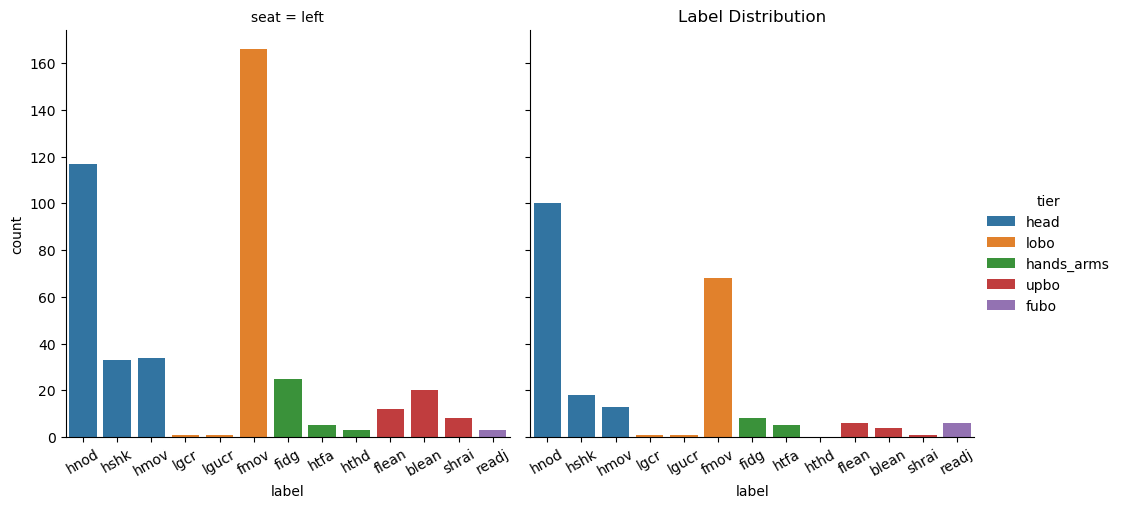

In [120]:
# Visualize Label Distribution
plt.figure(figsize=(10, 6))
g = sns.catplot(x='label', data=df, hue='tier', col="seat", kind='count')
g.set_xticklabels(rotation=30)
plt.title('Label Distribution')
plt.show()

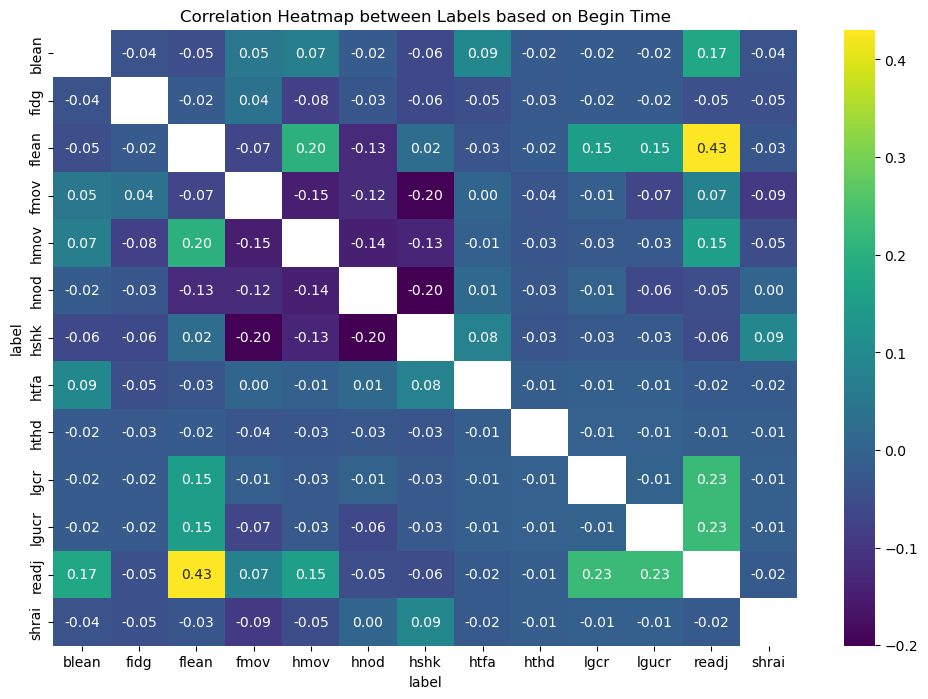

In [121]:
# Explore correlation between labels based on the begin time with NaN on the diagonal
plt.figure(figsize=(12, 8))
corr_matrix = df.groupby(['begin', 'label']).size().unstack(fill_value=0).corr()
np.fill_diagonal(corr_matrix.values, np.nan)  # Set diagonal values to NaN
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap between Labels based on Begin Time')
plt.show()

In [165]:
# Create a new column indicating the presence of a label
df['label_presence'] = 1

# Pivot the table
reshaped_df = df.groupby(['begin', 'end', 'seat', 'label'])['label_presence'].max().unstack(level=['seat', 'label'], fill_value=0)

# Reset index to make 'begin', 'end' as columns
reshaped_df = reshaped_df.reset_index()

# Add this line after reshaped_df = reshaped_df.reset_index()
reshaped_df.columns = [f'{col[0]}_{col[1]}' if isinstance(col, tuple) else col for col in reshaped_df.columns]

# Remove training _
reshaped_df.columns = [col[:-1] if col.endswith('_') else col for col in reshaped_df.columns]

# Remove end time and make begin the index
reshaped_df = reshaped_df.drop('end', axis=1).set_index('begin')



In [166]:
reshaped_df.columns

Index(['left_fmov', 'right_fmov', 'left_hnod', 'right_htfa', 'left_fidg',
       'right_hnod', 'left_hmov', 'left_flean', 'left_readj', 'left_blean',
       'right_shrai', 'right_hshk', 'left_htfa', 'right_fidg', 'right_hmov',
       'right_readj', 'left_hshk', 'right_flean', 'left_shrai', 'left_hthd',
       'left_lgucr', 'right_lgucr', 'right_lgcr', 'right_blean', 'left_lgcr'],
      dtype='object')

In [ ]:
# # Explore correlation between different tiers
# plt.figure(figsize=(12, 8))
# corr_matrix_tiers = df.groupby(['begin', 'tier']).size().unstack(fill_value=0).corr()
# np.fill_diagonal(corr_matrix_tiers.values, np.nan)  # Set diagonal values to NaN
# sns.heatmap(corr_matrix_tiers, annot=True, cmap='viridis', fmt='.2f')
# plt.title('Correlation Heatmap between Tiers based on Begin Time')
# plt.show()


In [157]:
# Match each entry the corresponding video path
# all videos are stored in "path to videos"
path_to_videos = "/videos/mpi_data/2Itzik/dyadic_communication/PIS_ID_000/"

# The folders end with the suffix "_split"
# Cam folders :
cam_folders = [osp.join(path_to_videos, f"Cam{ind}_split") for ind in range(1,5)]

cam_list_of_files = [ glob.glob(osp.join(a, '*.mp4')) for a in cam_folders]
all_path_maps = {}
for cam in range(1,5):
    path_mapping = {}
    for ind , f_name in enumerate(cam_list_of_files[cam-1]):
        path_mapping[ind*2000] = f_name
    all_path_maps[f'cam{cam}'] = path_mapping

file_mapping_df = pd.DataFrame.from_dict(all_path_maps)
file_mapping_df.index.name = 'begin'
file_mapping_df_reset = file_mapping_df.reset_index()

In [151]:
# file_mapping_df = file_mapping_df.reset_index()
# file_mapping_df.columns

In [159]:
reshaped_df.columns

Index(['participant_id', 'left_fmov', 'right_fmov', 'left_hnod', 'right_htfa',
       'left_fidg', 'right_hnod', 'left_hmov', 'left_flean', 'left_readj',
       'left_blean', 'right_shrai', 'right_hshk', 'left_htfa', 'right_fidg',
       'right_hmov', 'right_readj', 'left_hshk', 'right_flean', 'left_shrai',
       'left_hthd', 'left_lgucr', 'right_lgucr', 'right_lgcr', 'right_blean',
       'left_lgcr'],
      dtype='object')

In [160]:

# Reset index to make 'begin' a regular column


# Extract unique participant_ids and seats from reshaped_df
participant_seat_pairings_df = reshaped_df[['participant_id']].drop_duplicates()


# Create a DataFrame with all possible combinations of 'begin', 'participant_id', and 'seat'
all_combinations = pd.DataFrame({'begin': file_mapping_df_reset['begin'].repeat(len(participant_seat_pairings)),
                                 'participant_id': list(participant_seat_pairings.keys()) * len(file_mapping_df_reset),
                                 })

# Merge the reshaped DataFrame with the all_combinations DataFrame
merged_df = pd.merge(all_combinations, reshaped_df, how='left', on=['begin', 'participant_id'])

# Fill NaN values with 0
merged_df = merged_df.fillna(0)

# Display the merged DataFrame
print(merged_df)


KeyError: 'seat'

In [155]:
# Create a DataFrame with all possible combinations of 'begin' and 'participant_id'
all_combinations = pd.DataFrame({'begin': file_mapping_df_reset['begin'].repeat(2),
                                 's': file_mapping_df_reset['begin'].repeat(2)})


In [156]:
all_combinations

,begin,participant_id
0,0,0
0,0,0
1,2000,2000
1,2000,2000
2,4000,4000
...,...,...
554,1108000,1108000
555,1110000,1110000
555,1110000,1110000
556,1112000,1112000


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Data Preprocessing
# For simplicity, we'll use one-hot encoding for categorical variables
df_processed = pd.get_dummies(df, columns=['participant_id','seat', 'tier'])



# Train-Val-Test Split
X = df_processed.drop('label', axis=1)
y = df_processed['label']


# Resample the dataset using SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Val-Test Split on the resampled data
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, stratify=y_temp, random_state=42)


# Combine value counts into a table
split_info = pd.concat([
    y_train.value_counts().rename('Train Set'),
    y_val.value_counts().rename('Validation Set'),
    y_test.value_counts().rename('Test Set'),
], axis=1, sort=False).fillna(0).astype(int)

# Display the table
print(split_info)


       Train Set  Validation Set  Test Set
label                                     
shrg         164              14        56
hmov         164              14        56
htfa         164              14        56
flean        164              14        56
readj        164              14        56
blean        164              14        56
fidg         164              14        56
shrai        164              14        56
hnod         164              14        56
lgcr         164              14        56
hthd         164              14        56
fmov         163              14        57
lgucr        163              14        57
hshk         163              14        57
